In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# If we want to do time series manipulation, we’ll need to have a date time index so that our data frame is indexed on 
# the timestamp.
df = pd.read_csv('bhutan_fuel_prices.csv', parse_dates=['Approved_Date'], index_col='Approved_Date')
df.head()

Region      Product  \
Approved_Date                                
2022-04-01     Western Region  HSD (in KL)   
2022-04-01     Western Region  HSD (in KL)   
2022-04-01     Western Region  HSD (in KL)   
2022-04-01     Western Region  HSD (in KL)   
2022-04-01     Western Region  HSD (in KL)   

                                            Company        Station     RSP/KL  \
Approved_Date                                                                   
2022-04-01     Bharat Petroleum Corporation Limited  Phuentsholing   98497.76   
2022-04-01     Bharat Petroleum Corporation Limited    Rinchending   98578.22   
2022-04-01     Bharat Petroleum Corporation Limited        Pasakha   98631.86   
2022-04-01     Bharat Petroleum Corporation Limited     Chimakothi  100206.55   
2022-04-01     Bharat Petroleum Corporation Limited   Lungtenzampa  100650.06   

                RSP/L  
Approved_Date          
2022-04-01      98.50  
2022-04-01      98.58  
2022-04-01      98.63  
2022-04-01     100.21  
2022-04-01     100.65

In [4]:
# df[df['RSP/L']<30]

In [5]:
df.describe()

RSP/KL         RSP/L
count   11377.000000  11377.000000
mean    63861.075735     63.830219
std     13877.545175     13.916225
min         0.000000      0.000000
25%     54723.670000     54.680000
50%     63047.280000     63.050000
75%     72826.080000     72.830000
max    103511.930000    103.510000

In [6]:
df.dtypes

Region      object
Product     object
Company     object
Station     object
RSP/KL     float64
RSP/L      float64
dtype: object

In [7]:
df.shape

(11378, 6)

In [8]:
df.isna().sum()

Region      0
Product     1
Company    16
Station    30
RSP/KL      1
RSP/L       1
dtype: int64

In [9]:
# Total number of fuel stations in Bhutan

len(df.Station.unique())

69

In [10]:
df.Product.value_counts()


HSD (in KL)    5745
MS (in KL)     5614
SKO (in KL)      18
Name: Product, dtype: int64

In [11]:
index_names = df[ df['Product'] == 'SKO (in KL)' ].index
  
# drop these row indices from dataFrame
df.drop(index_names, inplace = True)

In [12]:
df.Product.value_counts()


HSD (in KL)    5654
MS (in KL)     5524
Name: Product, dtype: int64

In [13]:
# Note
# MS = Petrol
# HSD = High Speed Diesel (HSD) Diesel Oil 
# We will replace MS with Petrol and HSD with Diesel

In [14]:
df['Product'] = df['Product'].replace('HSD (in KL)', 'Diesel')
df['Product'] = df['Product'].replace('MS (in KL)', 'Petrol')
df.head()

Region Product                               Company  \
Approved_Date                                                                 
2022-04-01     Western Region  Diesel  Bharat Petroleum Corporation Limited   
2022-04-01     Western Region  Diesel  Bharat Petroleum Corporation Limited   
2022-04-01     Western Region  Diesel  Bharat Petroleum Corporation Limited   
2022-04-01     Western Region  Diesel  Bharat Petroleum Corporation Limited   
2022-04-01     Western Region  Diesel  Bharat Petroleum Corporation Limited   

                     Station     RSP/KL   RSP/L  
Approved_Date                                    
2022-04-01     Phuentsholing   98497.76   98.50  
2022-04-01       Rinchending   98578.22   98.58  
2022-04-01           Pasakha   98631.86   98.63  
2022-04-01        Chimakothi  100206.55  100.21  
2022-04-01      Lungtenzampa  100650.06  100.65

In [15]:
df.Region.value_counts()


Western Region    4642
Eastern Region    3582
Central Region    2954
                    1
Name: Region, dtype: int64

In [16]:
# In the above, we see that there is one unique Region, we will try to check the uniques values
df.Region.unique()

array(['Western Region', 'Central Region', 'Eastern Region', '\x1a'],
      dtype=object)

In [17]:
index_names = df[ df['Region'] == '\x1a' ].index
  
# drop these row indices from dataFrame
df.drop(index_names, inplace = True)

In [18]:
df.Region.unique()

array(['Western Region', 'Central Region', 'Eastern Region'], dtype=object)

In [19]:
df.Company.value_counts()

Indian Oil Corporation Limited             5870
Bharat Petroleum Corporation Limited       5069
Hindustan Petroleum Corporation Limited     224
Name: Company, dtype: int64

In [20]:
# Drop the "RSP/KL" column
df.drop(["RSP/KL"], axis = 1, inplace = True)


## EDA and Visualization

Visualize in which Region the fuel prices are most changed

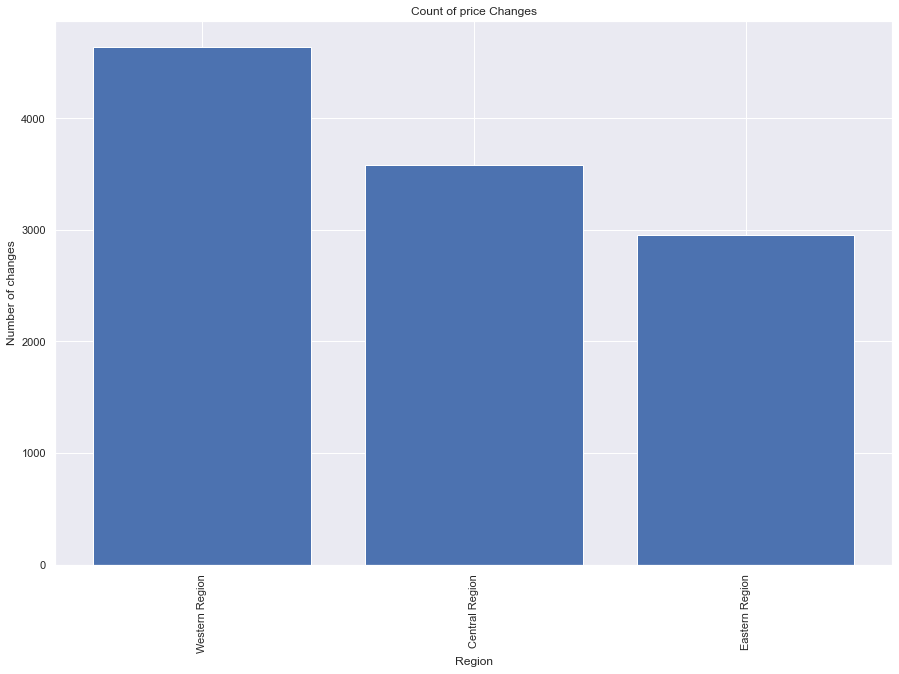

In [21]:

x = df.Region.unique()
y = df.Region.value_counts()[:20]

sns.set(rc={'figure.figsize':(15,10)})
plt.bar(x,y)
plt.title('Count of price Changes')
plt.xlabel('Region')
plt.ylabel('Number of changes')
plt.xticks(rotation=90)
plt.show()

In [22]:
df[df['RSP/L'] == df['RSP/L'].max()]

Region Product                               Company  \
Approved_Date                                                                 
2022-04-01     Eastern Region  Diesel  Bharat Petroleum Corporation Limited   

               Station   RSP/L  
Approved_Date                   
2022-04-01     Lhuntse  103.51

In [23]:
df[df['RSP/L'] == df['RSP/L'].min()]

Region Product  \
Approved_Date                           
2022-01-16     Western Region  Diesel   
2022-01-16     Western Region  Diesel   
2021-08-16     Western Region  Diesel   
2021-06-16     Central Region  Diesel   
2021-06-16     Central Region  Diesel   
2021-06-16     Central Region  Diesel   
2021-06-16     Central Region  Diesel   
2021-06-16     Central Region  Diesel   
2021-06-16     Central Region  Diesel   
2021-06-16     Central Region  Diesel   
2021-06-16     Central Region  Diesel   
2021-06-16     Central Region  Diesel   
2021-06-16     Central Region  Diesel   
2021-06-16     Central Region  Diesel   
2021-06-16     Central Region  Diesel   
2021-06-16     Eastern Region  Diesel   
2021-06-16     Eastern Region  Diesel   
2021-06-16     Eastern Region  Diesel   
2021-06-16     Eastern Region  Diesel   
2021-06-16     Eastern Region  Diesel   
2021-06-16     Eastern Region  Diesel   
2021-06-16     Eastern Region  Diesel   
2021-06-16     Eastern Region  Diesel   
2021-06-16     Eastern Region  Diesel   
2021-06-16     Eastern Region  Diesel   
2021-06-16     Eastern Region  Diesel   
2021-06-16     Eastern Region  Diesel   
2020-04-16     Western Region  Petrol   
2021-03-16     Western Region  Diesel   

                                               Company Station  RSP/L  
Approved_Date                                                          
2022-01-16     Hindustan Petroleum Corporation Limited     NaN    0.0  
2022-01-16     Hindustan Petroleum Corporation Limited     NaN    0.0  
2021-08-16     Hindustan Petroleum Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2020-04-16     Hindustan Petroleum Corporation Limited     NaN    0.0  
2021-03-16     Hindustan Petroleum Corporation Limited     NaN    0.0

In [24]:
# Retail Selling Price in litre (RSP/L)
# categoricaldf = df.drop('RSP/L', axis=1)
# y = df['RSP/L']
# y.columns = pd.DataFrame(y, columns=['RSP/L'])

In [25]:
## Scaling y

In [26]:
# scaler = StandardScaler()
# y_scaled = scaler.fit_transform(y)
# y = pd.DataFrame(y_scaled, columns=['RSP/L'])
# y.head()

In [27]:
# categoricaldf.head()

In [28]:
# categoricaldf.shape

### Fill null values with most_frequent values

In [29]:
# categoricaldf = df[['Region', 'Product', 'Company', 'Station']]
# categoricaldf.head()

In [30]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Region'] = imp.fit_transform(df[['Region']])
df['Product'] = imp.fit_transform(df[['Product']])
df['Company'] = imp.fit_transform(df[['Company']])
df['Station'] = imp.fit_transform(df[['Station']])

In [31]:
# df = pd.DataFrame(imp, columns=df.columns)
# df.head()

In [32]:
df.isnull().sum()

Region     0
Product    0
Company    0
Station    0
RSP/L      0
dtype: int64

In [33]:
df.head()

Region Product                               Company  \
Approved_Date                                                                 
2022-04-01     Western Region  Diesel  Bharat Petroleum Corporation Limited   
2022-04-01     Western Region  Diesel  Bharat Petroleum Corporation Limited   
2022-04-01     Western Region  Diesel  Bharat Petroleum Corporation Limited   
2022-04-01     Western Region  Diesel  Bharat Petroleum Corporation Limited   
2022-04-01     Western Region  Diesel  Bharat Petroleum Corporation Limited   

                     Station   RSP/L  
Approved_Date                         
2022-04-01     Phuentsholing   98.50  
2022-04-01       Rinchending   98.58  
2022-04-01           Pasakha   98.63  
2022-04-01        Chimakothi  100.21  
2022-04-01      Lungtenzampa  100.65

In [34]:

# one_hot_encoded_data = pd.get_dummies(df, columns = ['Region', 'Product', 'Company', 'Station'])
# newdf = one_hot_encoded_data
# newdf.head()

In [35]:
# newdf = newdf.astype('int64')

In [36]:
# newdf.dtypes

### Use LabelEncoder to encode categorical features

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Region'] = le.fit_transform(df['Region'])
df['Product'] = le.fit_transform(df['Product'])
df['Company'] = le.fit_transform(df['Company'])
df['Station'] = le.fit_transform(df['Station'])

In [38]:
df.head()

Region  Product  Company  Station   RSP/L
Approved_Date                                           
2022-04-01          2        0        0       45   98.50
2022-04-01          2        0        0       52   98.58
2022-04-01          2        0        0       43   98.63
2022-04-01          2        0        0        7  100.21
2022-04-01          2        0        0       31  100.65

In [39]:
df.Region.unique()

array([2, 0, 1])

In [40]:
df.Product.unique()

array([0, 1])

In [41]:
df.Company.unique()

array([0, 2, 1])

In [42]:
df.Station.unique()

array([45, 52, 43,  7, 31, 42, 22,  1,  2, 57, 59, 19, 15, 25, 14, 34, 37,
       40, 27, 66, 47, 16, 58, 10, 64, 67, 63,  4,  9, 28, 11, 39, 60, 17,
       18, 53, 65, 61, 62, 33, 21, 24, 44, 29, 23,  0, 12,  3, 51, 35, 54,
       36, 55, 30,  8, 41, 56, 38, 32, 13, 26,  6, 20, 49, 46, 48, 50,  5])

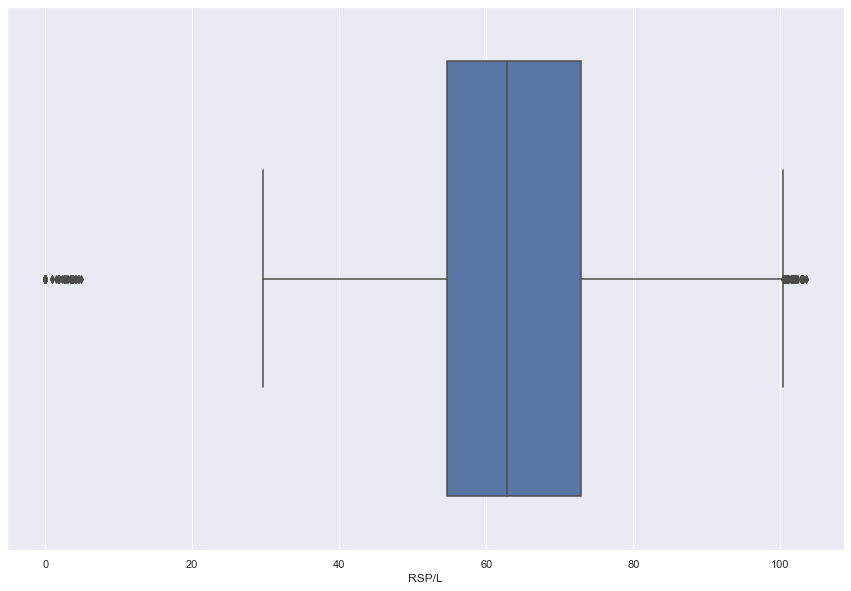

In [43]:
# Ploting boxplot to check outliers in price
sns.boxplot(x=df['RSP/L'])
plt.show()

Text(0, 0.5, 'Retail Selling Price')

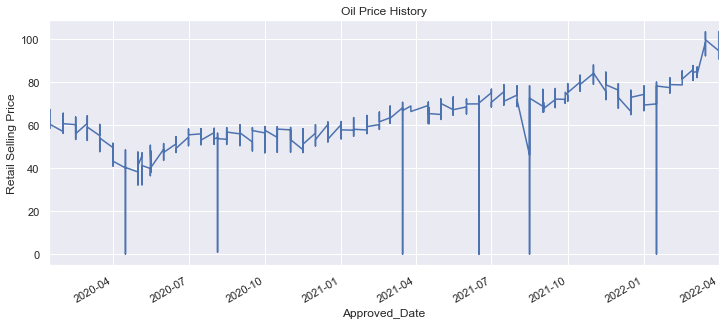

In [44]:
plt.title('Oil Price History')

df['RSP/L'].plot(figsize=(12,5)).autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Retail Selling Price')

In [45]:
# calculating IQR and upper limit and lower limit to find outliers
Q1 = df['RSP/L'].quantile(0.25)
Q3 = df['RSP/L'].quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)
print('upper limit: {}'.format(upperlimit))
print('lower limit: {}'.format(lowerlimit))

upper limit: 100.355
lower limit: 27.195000000000004


In [46]:
## checking outliers
df[(df['RSP/L'] < lowerlimit)  | (df['RSP/L'] > upperlimit)]

Region  Product  Company  Station   RSP/L
Approved_Date                                           
2022-04-01          2        0        0       31  100.65
2022-04-01          2        0        0       42  100.67
2022-04-01          2        0        0       22  101.50
2022-04-01          2        0        0        1  100.77
2022-04-01          2        0        0        2  101.09
...               ...      ...      ...      ...     ...
2020-08-05          1        1        2       23    1.71
2020-08-05          1        1        2        0    4.53
2020-08-05          1        1        2       12    3.54
2020-08-05          1        1        2        3    2.32
2020-08-05          1        1        2       51    3.47

[192 rows x 5 columns]

In [47]:
## Drop all the rows containing height beyond lower and upper limit.
df = df[(df['RSP/L'] > lowerlimit) & (df['RSP/L'] < upperlimit)]
df.shape

(10986, 5)

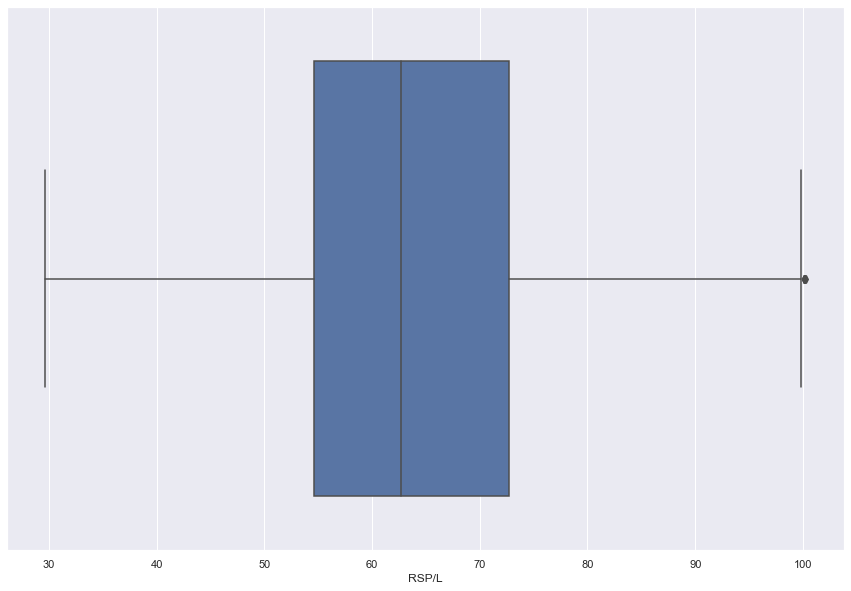

In [48]:
## ploting boxplot to check outliers are removed or not
sns.boxplot(x=df['RSP/L'])
plt.show()

In [49]:
df.to_csv('price.csv')

In [50]:
# df.sort_values(by=['Approved_Date'], inplace=True)
# df.head()

In [51]:
# df.tail()

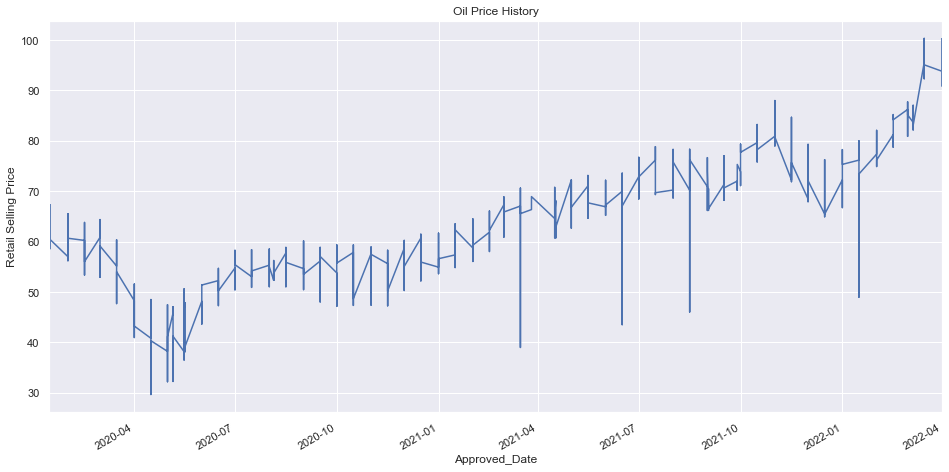

In [52]:
plt.title('Oil Price History')
df['RSP/L'].plot(figsize=(16,8)).autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Retail Selling Price')
plt.show()

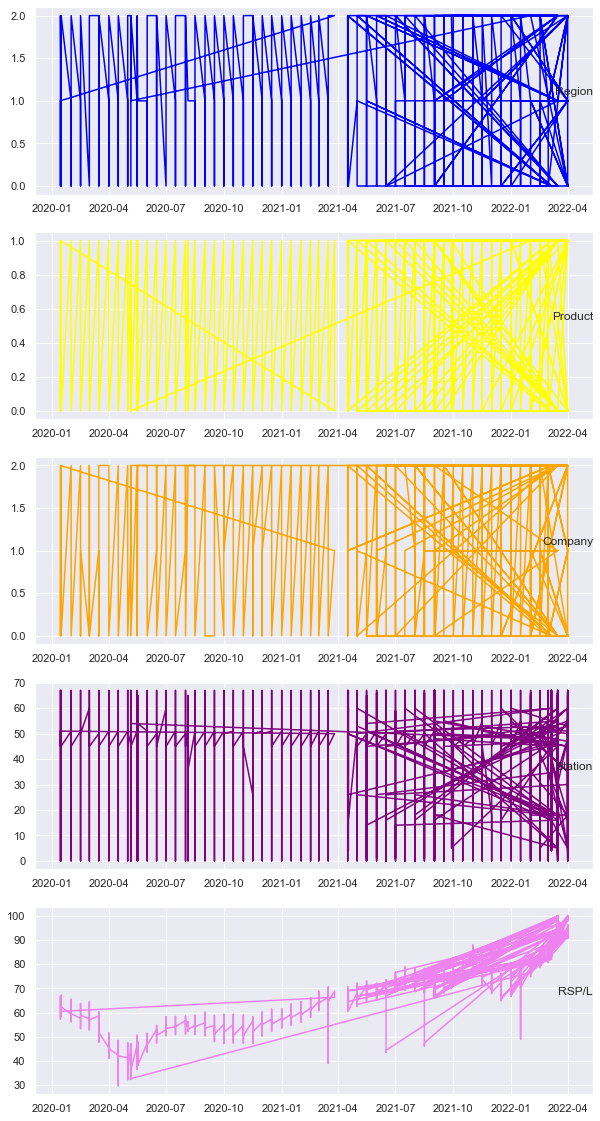

In [53]:
no_cols = len(df.columns)
index = 1
colors = ['red', 'blue', 'yellow', 'orange', 'purple', 'violet']
plt.figure(figsize=(10,20))

for column in df.columns:
    plt.subplot(no_cols, 1, index)
    plt.plot(df[column], color=colors[index])
    plt.title(column, loc='right', y=0.5)
    index += 1
    
plt.show()

### Scale the data

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# df = scaler.fit_transform(numerical_features.drop(columns='RSP/L', axis=1))
df['Region'] = scaler.fit_transform(df[['Region']])
df['Product'] = scaler.fit_transform(df[['Product']])
df['Company'] = scaler.fit_transform(df[['Company']])
df['Station'] = scaler.fit_transform(df[['Station']])
df['RSP/L'] = scaler.fit_transform(df[['RSP/L']])

In [55]:
df.head()

Region   Product   Company   Station     RSP/L
Approved_Date                                                  
2022-04-01     1.044693 -1.002917 -1.082841  0.554277  2.732420
2022-04-01     1.044693 -1.002917 -1.082841  0.890925  2.738703
2022-04-01     1.044693 -1.002917 -1.082841  0.458092  2.742630
2022-04-01     1.044693 -1.002917 -1.082841 -1.273240  2.866711
2022-04-01     1.044693 -1.002917 -1.082841  1.131387  2.693154

In [56]:
# newdf = df['RSP/L'].astype('float64')
# pricedf = pd.DataFrame(newdf, columns=['RSP/L'])
# pricedf.head()

In [57]:
# # visualize Retail Selling Price
# plt.figure(figsize=(16, 8))
# plt.title('Oil Price History')
# df['RSP/L'].plot().autoscale(enable=True, axis='x', tight=True)
# plt.xlabel('Date', fontsize=18)
# plt.ylabel('Retail Selling Price')

In [58]:
# from sklearn.preprocessing import OneHotEncoder

# enc = OneHotEncoder(handle_unknown='ignore')

# encX = pd.DataFrame(enc.fit_transform(df['Region', 'Product', 'Company', 'Station']), columns=['Region', 'Product', 'Company', 'Station'])

# encX

In [59]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.20, shuffle=False)


In [60]:
### Generate time series data

from keras.preprocessing.sequence import TimeseriesGenerator

# look_back
n_input = 3
n_features = 5

generatorTrain = TimeseriesGenerator(np.array(train), np.array(train), length=n_input, batch_size=1)

generatorTest = TimeseriesGenerator(test, test, length=n_input, batch_size=1)

In [61]:
batch_0 = generatorTrain[0]

x, y = batch_0

print(x, y)
    

[[[ 1.044693   -1.00291705 -1.08284075  0.55427688  2.73242041]
  [ 1.044693   -1.00291705 -1.08284075  0.8909247   2.738703  ]
  [ 1.044693   -1.00291705 -1.08284075  0.45809179  2.74262962]]] [[ 1.044693   -1.00291705 -1.08284075 -1.27323987  2.8667108 ]]


In [62]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM



In [63]:
EPOCHS = 30

# create and fit the LSTM network
# define model

model = Sequential()  
model.add(LSTM(50, activation='tanh', input_shape=(n_input, n_features)))  # input layer, 50 neurons, input_shape = (no of past or lags, number of features)
model.add(Dense(n_features))   # output layer defines no of outputs(features)
model.compile(optimizer='adam', loss='mse')   # loss and optimizers when compiling

model.fit(generatorTrain, epochs=EPOCHS, batch_size=32, shuffle=False)


Epoch 1/30
5722/8785 [==================>...........] - ETA: 12s - loss: 0.3109

KeyboardInterrupt: 

### Predict the data

In [ ]:
import numpy as np 

predictions = []

first_batch = train[-n_input:] # last 3 train data (t-3, t-2, t-1)

current_batch = np.array(first_batch).reshape((1, n_input, n_features)) # create the current batch using reshape from the first batch

# print(first_batch)

# for each iteration, predict and remove one data from the current batch and add to the test
for i in range(len(test)):
    
    # get the prediction value for the first batch 
    current_pred = model.predict(current_batch)[0]
    
    # print(current_batch)
    # appent the prediction into the array
    predictions.append(current_pred)
    
    # remove the first value
    current_batch_rmv_first = current_batch[:, 1:, :]
    # update the batch
    current_batch = np.append(current_batch_rmv_first, [[current_pred]], axis=1)
    
    

In [ ]:
import matplotlib.pyplot as plt

predictions_actual_scale = scaler.inverse_transform(predictions)
test_data_actual_scale = scaler.inverse_transform(test)
# print(predictions_actual_scale[:, 0])

plt.plot(predictions_actual_scale[:, -1])  # last feature(price) from the predicted data
plt.plot(test_data_actual_scale[:, -1])   # last feature from test data (yellow line)

In [ ]:
test_data_actual_scale[:, -1]

In [ ]:
predictions_actual_scale[:, -1]

In [ ]:
# calculate RMSE

from math import sqrt 

from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test_data_actual_scale[:, -1], predictions_actual_scale[:, -1]))

print('Test RMSE: %.3f' % rmse)

In [ ]:
model.evaluate(generatorTrain, batch_size=32)


In [ ]:
# from sklearn.model_selection import TimeSeriesSplit

# tscv = TimeSeriesSplit()

# for train_index, test_index in tscv.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = df[train_index], df[test_index]
#     y_train, y_test = df[train_index], df[test_index]

In [ ]:
# Creating Pipeline for the model

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder

In [ ]:
# Separate the Categorical and Numerical Columns
# Numeric columns
numeric_cols = X.select_dtypes(include=['int64','float64']).columns
print(numeric_cols)

# categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
print(categorical_cols)

In [ ]:
categorical_index = [X.columns.get_loc(col) for col in categorical_cols]
categorical_index

In [ ]:
# Building the Categorical Transformation Pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy = 'most_frequent',fill_value='missing')),
    ('oe',LabelEncoder())  # Try with LabelEncoder
])

In [ ]:
# Combine the numeric and categorical transformers
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    
    transformers = [('categorical',categorical_transformer,categorical_index)]
    
)

In [ ]:
# Create the estimator for training
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators = 200, max_depth = 3, random_state = 1)
  

In [ ]:
# Assemble the individual blocks to form the main pipeline
main_model = Pipeline(
    steps = [
      ('preprocessor', preprocessor), #Preprocessing
      ('model'  , gbr)  #Model
    ]
)

In [ ]:
#Training the model using pipeline
# Display Pipeline
from sklearn import set_config
set_config(display='diagram')
#fit data
main_model.fit(X_train, y_train)

In [ ]:
#Import all the metrics for validation and evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import seaborn as sns

In [ ]:
y_pred = main_model.predict(x_test)
print(y_pred)

In [ ]:
y_test

In [ ]:
main_model.score(X_train, y_train)

In [ ]:
# Save Model using pickle
import pickle
pickle.dump(testmodel, open("testmodel.pkl","wb"))

In [ ]:
#load pickle model
model = pickle.load(open("testmodel.pkl","rb"))
model